### First Try of Predicting Salary

For the last two questions regarding what are related to relationships of variables with salary and job satisfaction - Each of these questions will involve not only building some sort of predictive model, but also finding and interpretting the influential components of whatever model we build.

To get started let's read in the necessary libraries and take a look at some of our columns of interest.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import WhatHappened as t
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now take a look at the summary statistics associated with the quantitative variables in your dataset. 

In [2]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


#### Question 1

**1.** Use the above to match each variable (**a**, **b**, **c**, **d**, **e**, or **f**) as the appropriate key that describes the value in the **desc_sol** dictionary.

In [3]:
a = 40
b = 'HoursPerWeek'
c = 'Salary'
d = 'Respondent'
e = 10
f = 'ExpectedSalary'

desc_sol = {'A column just listing an index for each row': d,
       'The maximum Satisfaction on the scales for the survey': e,
       'The column with the most missing values': f,
       'The variable with the highest spread of values': c}

# Check your solution
t.describe_check(desc_sol)

Nice job that looks right!


A picture can often tell us more than numbers.

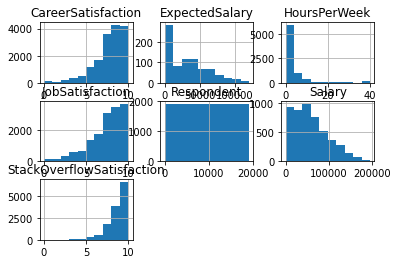

In [4]:
df.hist();

Often a useful plot is a correlation matrix - this can tell you which variables are related to one another.

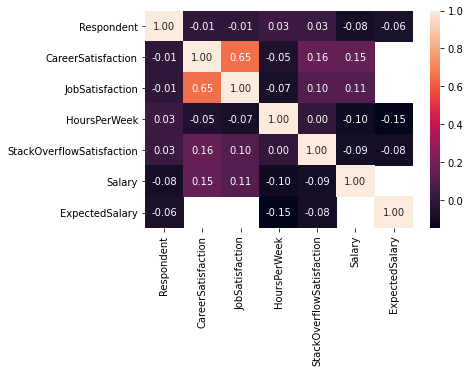

In [5]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

#### Question 2

**2.** Use the scatterplot matrix above to match each variable (**a**, **b**, **c**, **d**, **e**, **f**, or **g**) as the appropriate key that describes the value in the **scatter_sol** dictionary.

In [ ]:
a = 0.65
b = -0.01
c = 'ExpectedSalary'
d = 'No'
e = 'Yes'
f = 'CareerSatisfaction'
g = -0.15

scatter_sol = {'The column with the strongest correlation with Salary': f,
       'The data suggests more hours worked relates to higher salary': d,
       'Data in the ______ column meant missing data in three other columns': c,
       'The strongest negative relationship had what correlation?': g}

t.scatter_check(scatter_sol)

Here we move our quantitative variables to an X matrix, which we will use to predict our response.  We also create our response.  We then split our data into training and testing data.  Then when starting our four step process, our fit step breaks.  

### Remember from the video, this code will break

In [ ]:
# Consider only numerical variables
X = df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score

#### Question 3

**3.** Use the results above to match each variable (**a**, **b**, **c**, **d**, **e**, or **f** ) as the appropriate key that describes the value in the **lm_fit_sol** dictionary.

In [ ]:
a = 'it is a way to assure your model extends well to new data'
b = 'it assures the same train and test split will occur for different users'
c = 'there is no correct match of this question'
d = 'sklearn fit methods cannot accept NAN values'
e = 'it is just a convention people do that will likely go away soon'
f = 'python just breaks for no reason sometimes'

lm_fit_sol = {'What is the reason that the fit method broke?': d,
       'What does the random_state parameter do for the train_test_split function?': b,
       'What is the purpose of creating a train test split?': a}

t.lm_fit_check(lm_fit_sol)